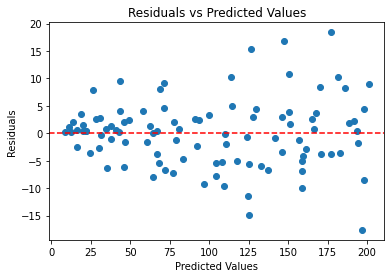

Breusch-Pagan p-value: 0.0010


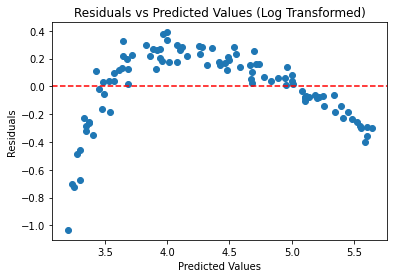

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(42)
X = np.random.uniform(1, 100, 100)  # Independent variable
y = 5 + 2 * X + np.random.normal(0, X**0.5, 100)  # Dependent variable with heteroscedasticity

# Convert to DataFrame
data = pd.DataFrame({'X': X, 'y': y})

# Fit the regression model
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)
y_pred = model.predict(X_reshaped)

# Plot residuals vs. predicted values
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Add constant for statsmodels
X_with_constant = sm.add_constant(X)

# Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X_with_constant)
bp_p_value = bp_test[1]

print(f"Breusch-Pagan p-value: {bp_p_value:.4f}")


# Apply log transformation
data['log_y'] = np.log(data['y'])

# Fit regression model on transformed data
model_log = LinearRegression()
model_log.fit(X_reshaped, data['log_y'])
y_pred_log = model_log.predict(X_reshaped)

# Plot residuals for log-transformed model
residuals_log = data['log_y'] - y_pred_log

plt.scatter(y_pred_log, residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values (Log Transformed)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


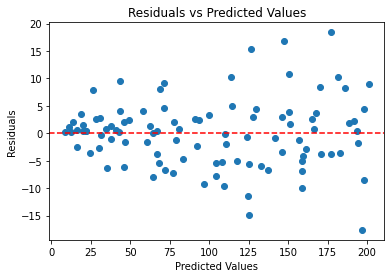

In [40]:
# Fit the regression model
X_reshaped = X.reshape(-1, 1)
model = LinearRegression()
model.fit(X_reshaped, y)
y_pred = model.predict(X_reshaped)

# Plot residuals vs. predicted values
residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Load a sample dataset (e.g., Iris dataset)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# For binary classification, select only two classes (e.g., 0 and 1)
X = X[y != 2]
y = y[y != 2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficient matrix (weights of the features)
coefficients = model.coef_

# Print the coefficient matrix
print("Coefficient Matrix:\n", coefficients)

# Optionally, print the intercept as well
print("\nIntercept:", model.intercept_)


Coefficient Matrix:
 [[ 0.44970541 -0.81916832  2.15293459  0.90745175]]

Intercept: [-6.33969108]


In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# For binary classification, select only classes 0 and 1
X = X[y != 2]
y = y[y != 2]

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit a Logistic Regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the model which includes weights, standard errors, z-values, p-values, etc.
print(result.summary())


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        18:15:51   Log-Likelihood:            -8.9814e-06
converged:                      False   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 5.547e-29
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.6813    1.2e+04      0.001      0.999   -2.35e+04    2.35e+04
sepal length (cm)    -4.1173   3316.583     

In [48]:
from sklearn.metrics import accuracy_score

data = load_iris()
X = data.data
y = data.target
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Softmax (Multinomial) logistic regression
model_softmax = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_softmax.fit(X_train, y_train)

# Predict on test data
y_pred_softmax = model_softmax.predict(X_test)

# Accuracy of Softmax
accuracy_softmax = accuracy_score(y_test, y_pred_softmax)
print(f'Softmax Accuracy: {accuracy_softmax:.4f}')
print("Softmax Coefficients:")
print(model_softmax.coef_)
print("Intercepts:", model_softmax.intercept_)

Softmax Accuracy: 1.0000
Softmax Coefficients:
[[-0.40460943  0.86845599 -2.27800678 -0.95749012]
 [ 0.46652103 -0.37524168 -0.18767965 -0.72036774]
 [-0.06191161 -0.49321431  2.46568643  1.67785786]]
Intercepts: [  8.86217263   2.20990944 -11.07208207]


In [49]:
# One-vs-Rest logistic regression
model_ovr = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
model_ovr.fit(X_train, y_train)

# Predict on test data
y_pred_ovr = model_ovr.predict(X_test)

# Accuracy of One-vs-Rest
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
print(f'One-vs-Rest Accuracy: {accuracy_ovr:.4f}')


One-vs-Rest Accuracy: 0.9556


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import pandas as pd

# Sample dataset
df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 2, 3, 4],
    'C': [5, None, 7, 8]
})

# Initial imputation to fill missing values
imputer = SimpleImputer(strategy='mean')
initial_data = imputer.fit_transform(df)

# Predict missing values for column 'A' using Random Forest
rf = RandomForestRegressor()
not_null = df['A'].notnull()
rf.fit(initial_data[not_null, 1:], df.loc[not_null, 'A'])
predicted_values = rf.predict(initial_data[~not_null, 1:])

# Replace missing values with predicted values
df.loc[~not_null, 'A'] = predicted_values


         Current function value: 0.000000
         Iterations: 35


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


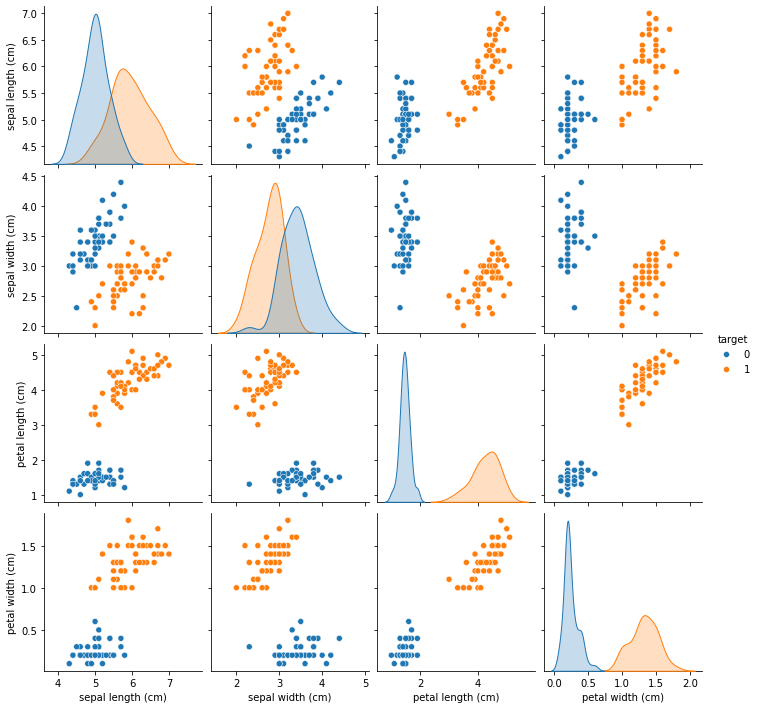

VIF values:
              feature        VIF
0  sepal length (cm)   4.803414
1   sepal width (cm)   2.594389
2  petal length (cm)  36.246326
3   petal width (cm)  25.421395
Number of samples: 70, Number of predictors: 5
Rule of thumb for sample size: n > 10 * p


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:5283: RuntimeWarning: divide by zero encountered in log
  res = -(1-endog)*np.sqrt(2*M*np.abs(np.log(1-p))) + \
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:5283: RuntimeWarning: invalid value encountered in multiply
  res = -(1-endog)*np.sqrt(2*M*np.abs(np.log(1-p))) + \


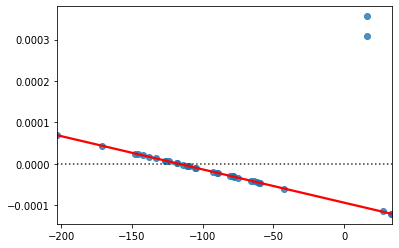

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   70
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Nov 2024   Pseudo R-squ.:                   1.000
Time:                        20:31:39   Log-Likelihood:            -1.9365e-07
converged:                      False   LL-Null:                       -48.406
Covariance Type:            nonrobust   LLR p-value:                 4.692e-20
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0597   4.77e+07   -1.9e-07      1.000   -9.34e+07    9.34e+07
x1           -63.3517   6.82e+07  -9.29e-07      1.000   -1.34e+08    1.34e+08
x2             1.9029   3.05e+07   6.23e-08      1.0

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Load dataset (Iris dataset for demonstration)
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# For this example, let's convert target to binary: 0 vs 1
df = df[df['target'] != 2]  # Remove the "setosa" class, keeping only "versicolor" and "virginica"
df['target'] = df['target'].map({0: 0, 1: 1})

# 2. Split dataset into features and target
X = df.drop(columns=['target'])
y = df['target']

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Fit logistic regression model using statsmodels
X_train = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# 6. Assumptions checks

# Assumption 1: Linearity of the logit
# Check using Box-Tidwell test (partial residuals)
# In practice, you can look at interactions or perform Box-Tidwell.
# Here, we're using scatter plot matrix for visualization
sns.pairplot(df, hue='target')
plt.show()

# Assumption 2: Independence of observations
# This can be ensured by proper sampling or study design. For demonstration, no test here.

# Assumption 3: No multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("VIF values:\n", vif_data)

# Assumption 4: Sufficient sample size
# Rule of thumb: n > 10 * p (where p is number of predictors)
print(f"Number of samples: {X_train.shape[0]}, Number of predictors: {X_train.shape[1]}")
print("Rule of thumb for sample size: n > 10 * p")

# Assumption 5: Outliers
# Check for outliers using residual plots or influence measures
sns.residplot(x=result.fittedvalues, y=result.resid_dev, lowess=True, line_kws={'color': 'red'})
plt.show()

# Assumption 6: Logistic regression model summary
print(result.summary())


